In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the required libraries for the dataset

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/priyapandey12345/Internship/main/excel%20HR.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Read the csv file to get the dataset

In [3]:
df['Attrition'].replace('No',0,inplace=True)
df['Attrition'].replace('Yes',1,inplace=True)

In [4]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Need to convert target variable which is in string form we will convert into integer

In [5]:
df.shape

(1470, 35)

Here we are checking the shape of dataset

In [6]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Here describing the dataset

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Need to check the null values present in our dataset. we can see that there are no null values preent in this dataset

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


We are checking the head & tail in our dataset

In [10]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Numerical Columns:  ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Need to check the categorical & numerical data present in our dataset and then categorical data needs to be converted into numerical to proceed the further

In [11]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

Checking the skewness of the dataset

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
df=pd.get_dummies(df).astype(int)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


Need to convert the dataset into dummy dataset so that we can convert the categorical data into numerical data to proceed the further

In [14]:
df.drop(['DistanceFromHome'], axis=1, inplace=True)

In [15]:
df.drop(['EmployeeNumber'], axis=1, inplace=True)

Here droping few columns 

In [16]:
df.shape

(1470, 54)

In [17]:
df.skew()

Age                                  0.413286
Attrition                            1.844366
DailyRate                           -0.003519
Education                           -0.289681
EmployeeCount                        0.000000
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StandardHours                        0.000000
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                    

<AxesSubplot:>

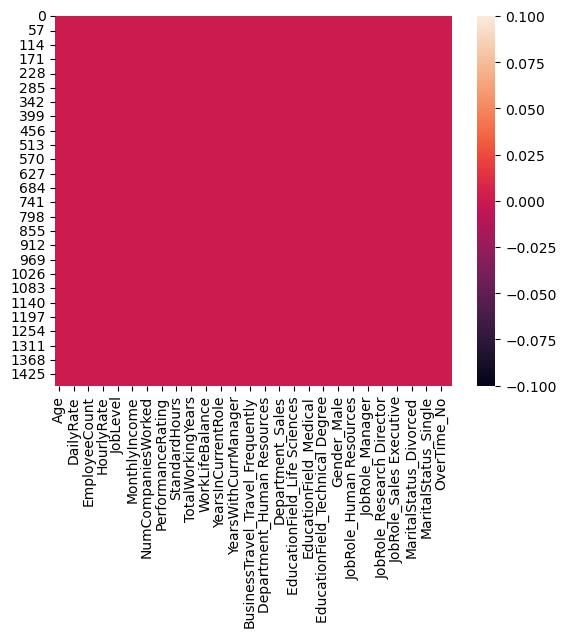

In [18]:
sns.heatmap(df.isnull())

Above we have represented the dataset with heatmap

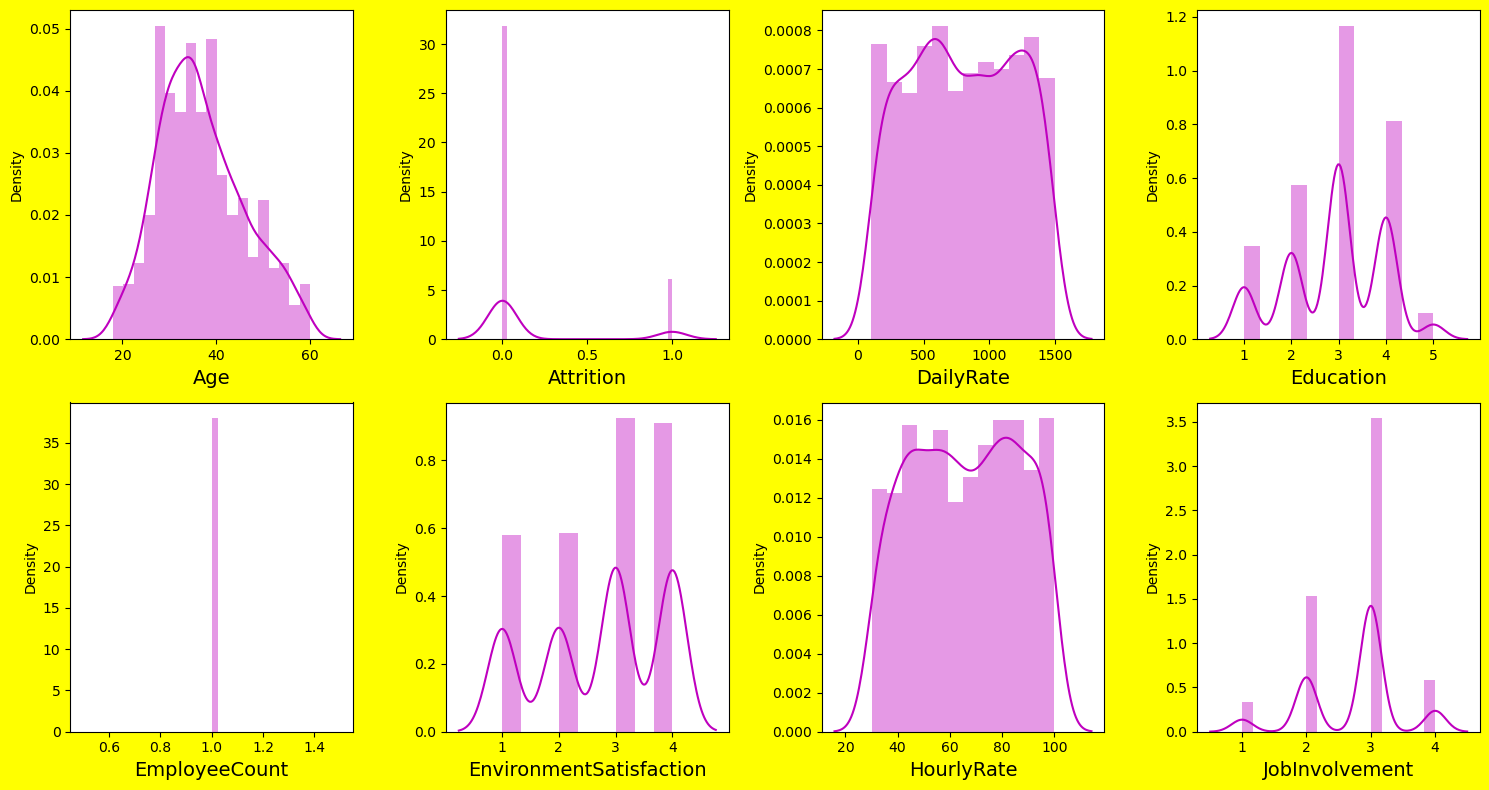

In [19]:
plt.figure(figsize=(15,8), facecolor= "yellow")
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Representing dataset with distplot

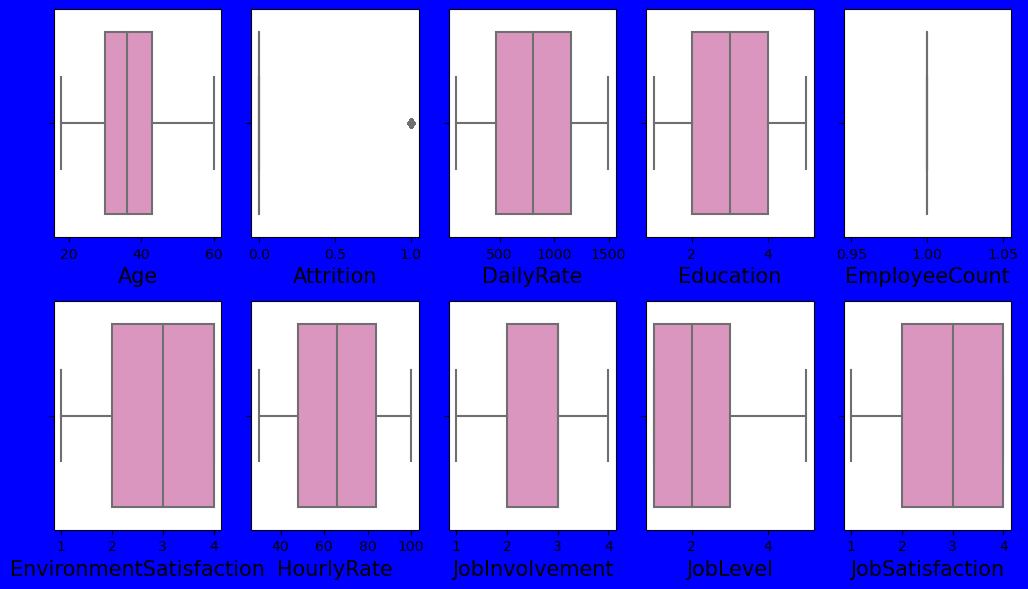

In [20]:
plt.figure(figsize=(10,6), facecolor= 'blue')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Representing the dataset with the boxplot to check the skewness in the dataset

In [22]:
cor= df.corr()
cor

,Age,Attrition,DailyRate,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
Age,1.000000,-0.159205,0.010661,0.208034,NaN,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,NaN,-0.028062,0.028062
Attrition,-0.159205,1.000000,-0.056652,-0.031373,NaN,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419,NaN,-0.246118,0.246118
DailyRate,0.010661,-0.056652,1.000000,-0.016806,NaN,0.018355,0.023381,0.046135,0.002966,0.030571,...,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,NaN,-0.009135,0.009135
Education,0.208034,-0.031373,-0.016806,1.000000,NaN,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,NaN,0.020322,-0.020322
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.027128,NaN,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,NaN,-0.070132,0.070132
HourlyRate,0.024287,-0.006846,0.023381,0.016775,NaN,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436,NaN,0.007782,-0.007782
JobInvolvement,0.029820,-0.130016,0.046135,0.042438,NaN,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253,NaN,0.003507,-0.003507
JobLevel,0.509604,-0.169105,0.002966,0.101589,NaN,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.414319,-0.387788,0.127490,-0.216559,0.037087,0.050547,-0.087072,NaN,-0.000544,0.000544
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.011296,NaN,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.006217,0.020503,0.012604,0.001413,-0.015197,-0.010315,0.024571,NaN,-0.024539,0.024539


Check the correlation in the dataset

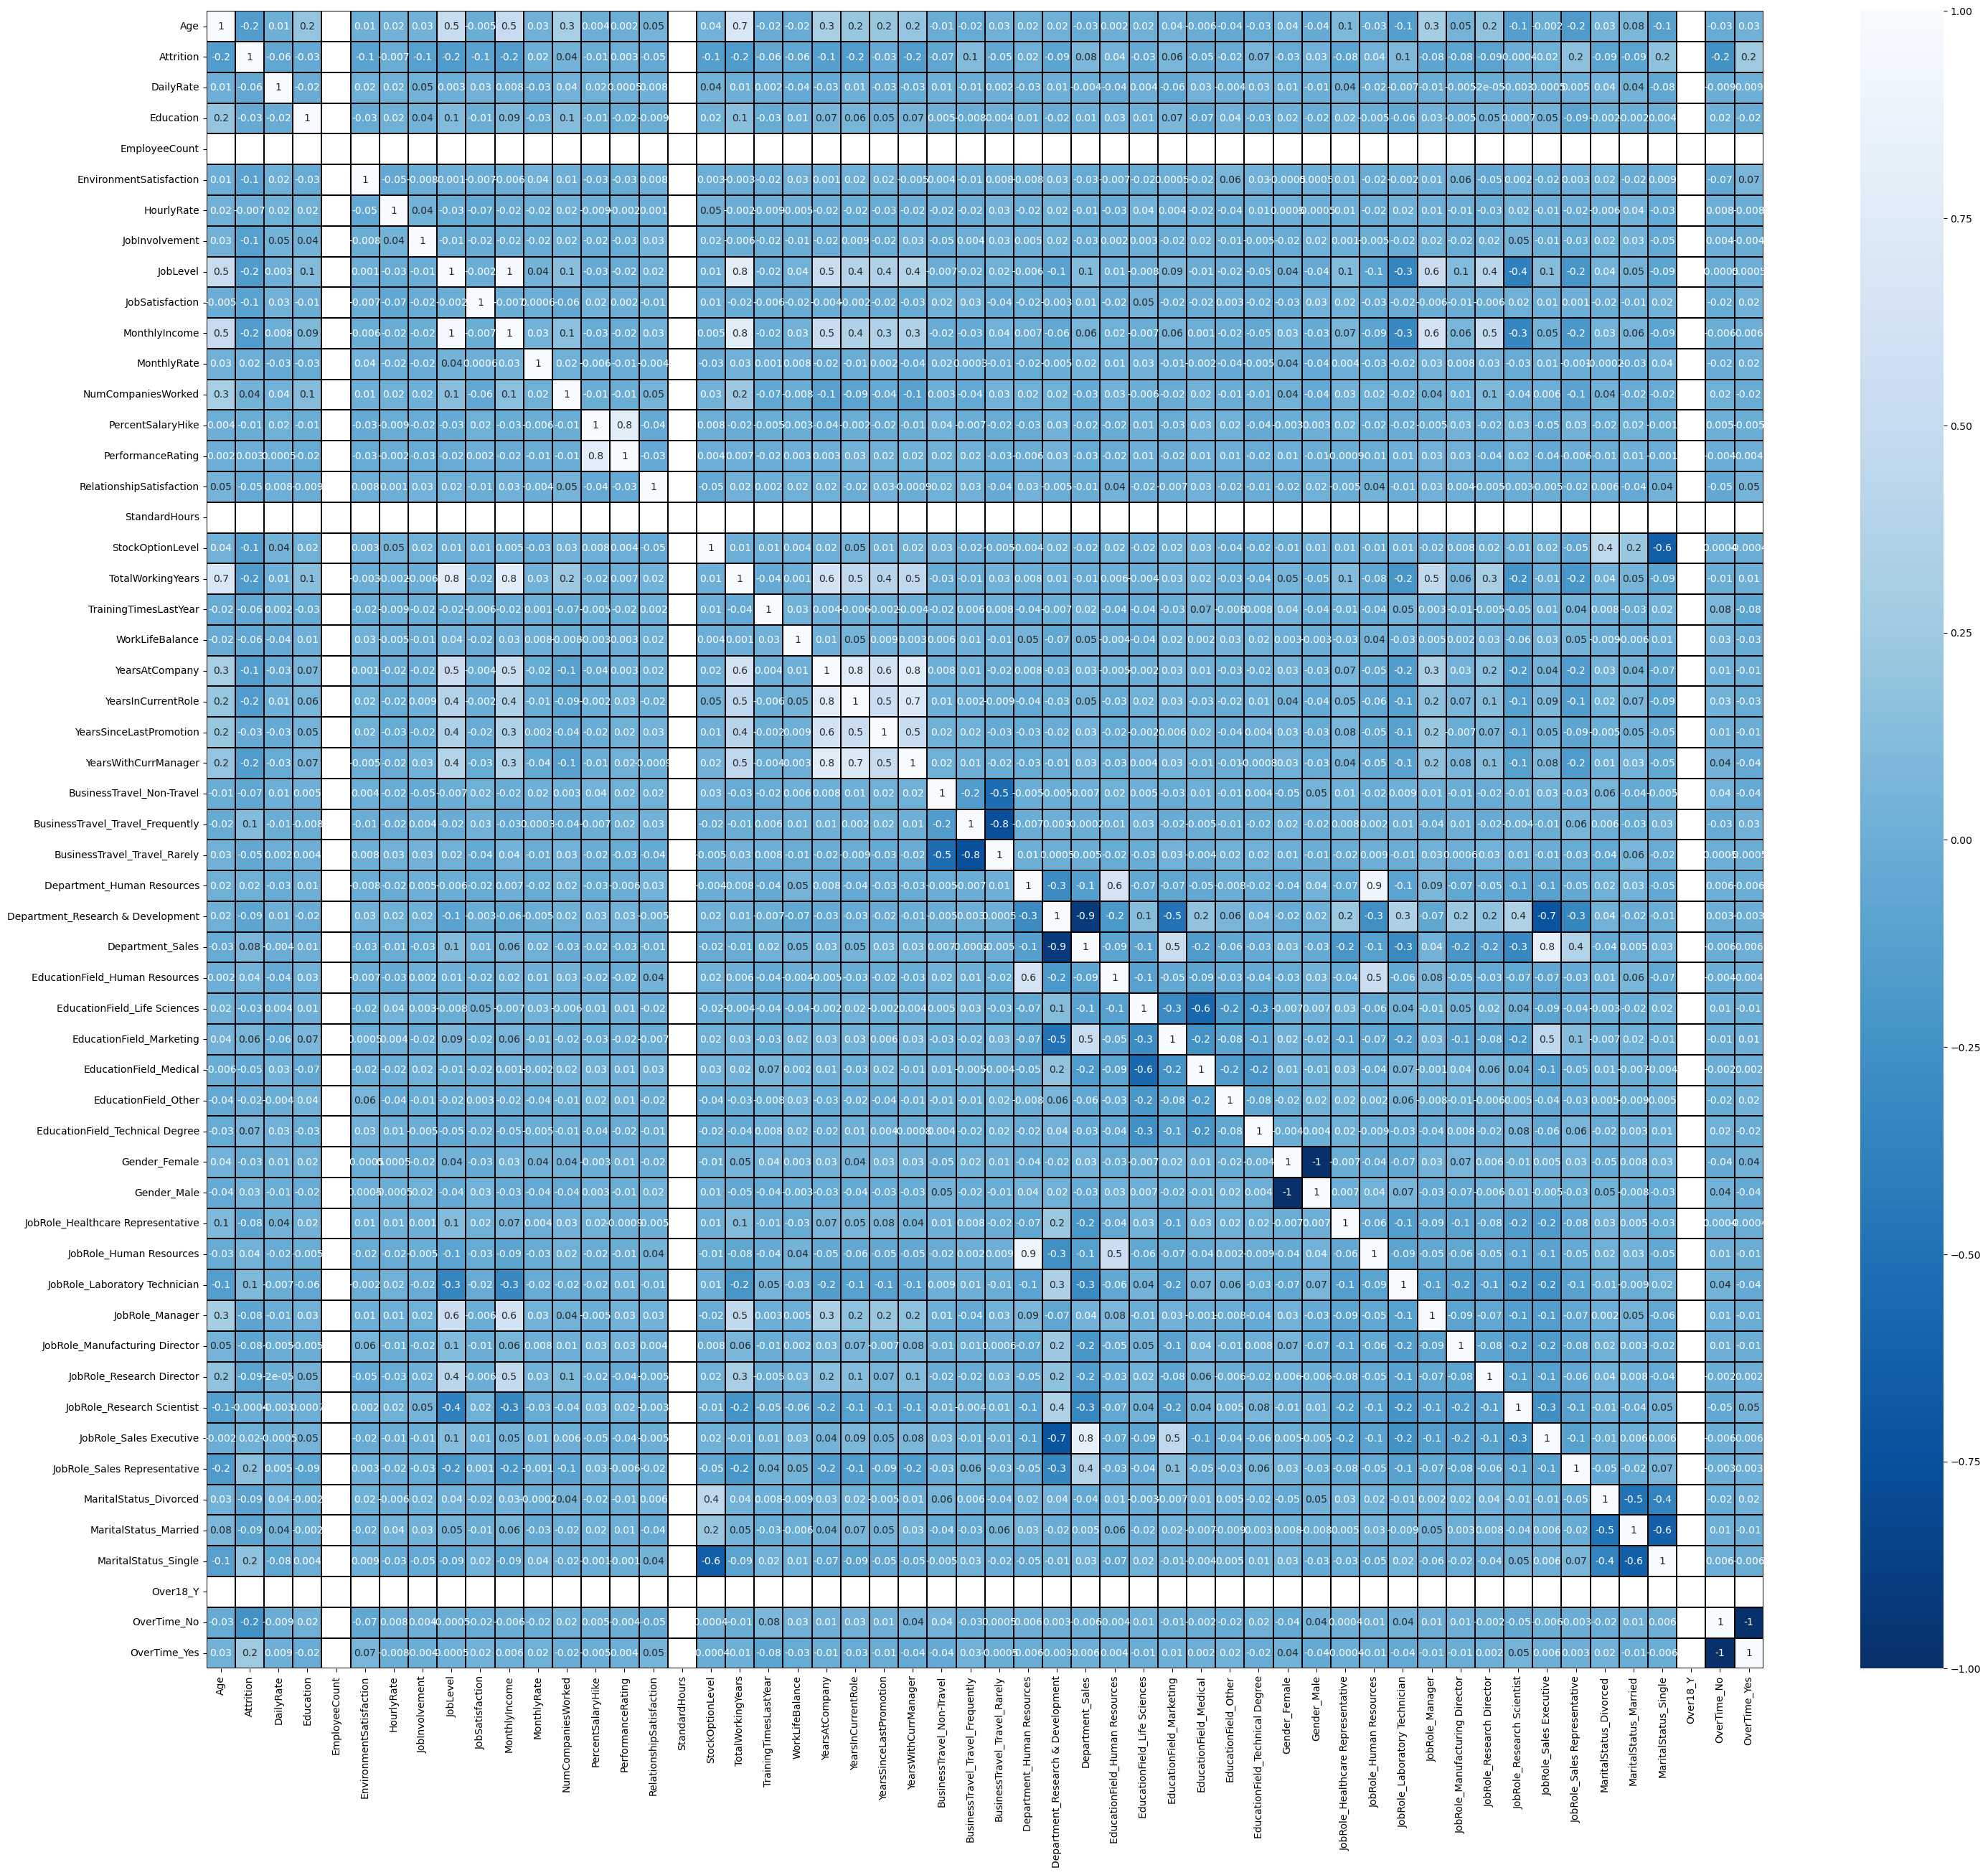

In [23]:
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

By using the heatmap we are showing the correlation of the dataset

In [24]:
y=df['Attrition']
x=df.drop('Attrition',axis=1)

We need to drop the target variable 

In [26]:
df.head()

,Age,Attrition,DailyRate,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,2,1,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,1,1,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,1,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,4,1,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,1,1,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


In [27]:
df.head()

,Age,Attrition,DailyRate,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,2,1,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,1,1,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,1,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,4,1,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,1,1,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,DailyRate,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-0.891688,0.0,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,0.0,-1.591746,1.591746
1,1.322365,-1.297775,-1.868426,0.0,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
2,0.008343,1.414363,-0.891688,0.0,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,0.0,-1.591746,1.591746
3,-0.429664,1.461466,1.061787,0.0,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,-1.591746,1.591746
4,-1.086676,-0.524295,-1.868426,0.0,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,-0.891688,0.0,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
1466,0.227347,-0.469754,-1.868426,0.0,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
1467,-1.086676,-1.605183,0.085049,0.0,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,-1.591746,1.591746
1468,1.322365,0.546677,0.085049,0.0,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,...,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.10777359340400657
R-squared (R2) Score: 0.0632962976904261


Here we have created the model of the dataset

In [33]:
import joblib
joblib.dump(model,"Attrition.pkl")

['Attrition.pkl']

In [34]:
model = joblib.load("Attrition.pkl")
prediction = model.predict(X_test)
prediction

array([ 1.53149048e-01, -2.08954295e-01,  2.79512921e-01,  1.87049304e-02,
        1.91938797e-01,  4.20266652e-01,  3.05162827e-01,  1.09124700e-01,
        1.50478760e-01, -5.14235104e-02,  5.18909955e-01,  1.52689377e-01,
        1.74066940e-01,  1.34655500e-01,  7.06562196e-02,  2.81319061e-01,
        3.50714231e-01,  1.83729569e-01,  2.43760610e-01,  1.76736394e-01,
        3.42363754e-01, -1.22711619e-01,  9.25364887e-02,  3.47709203e-01,
        1.95712606e-01, -1.01055707e-02,  1.73233429e-01, -1.32546033e-02,
        1.14683548e-01,  1.10597173e-01, -1.00216349e-01, -1.86410388e-01,
       -1.77779635e-01,  1.38197342e-01,  4.50494314e-01, -7.80872906e-02,
       -2.33824214e-01,  2.84932653e-01,  6.31649518e-01,  2.90761386e-02,
        1.89154068e-01,  1.27562085e-01,  1.66225949e-01,  9.21674167e-02,
        5.78770185e-01, -5.85674847e-02,  5.10681653e-01,  3.89463822e-01,
        4.40495992e-01,  4.61710477e-01,  5.19252216e-02,  2.84981275e-01,
        7.91649019e-02,  

In [35]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,0.153149,0
1,-0.208954,0
2,0.279513,1
3,0.018705,0
4,0.191939,0
...,...,...
289,0.015122,0
290,0.051622,0
291,0.133897,0
292,0.072018,0


We have predicted the attrition in the HR dataset